A notebook to handle figures for the (revisions of) the yoder et al. 2016 Global/Nepal ETAS paper.

In [1]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#import functools
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
from eq_params import *
#
import random
import geopy
#
#colors_ =  mpl.rcParams['axes.color_cycle']
colors_ = ['b', 'g', 'r', 'c', 'm', 'y', 'k']		# make sure these are correct...
#
emc = {'lat':32.13, 'lon':-115.30, 'event_date':dtm.datetime(2010,4,4,22,40,41, tzinfo=pytz.timezone('UTC'))}
nepal_epi_lon = 84.698
nepal_epi_lat = 28.175
nepal_tms = dtm.datetime(2015, 4, 26, 7, 5, 19 ,tzinfo=pytz.timezone('UTC'))

#
# set up dict objects for different earthquakes. maybe from eq_params.py ?
param_keys = ['lat_center', 'lon_center', 'to_dt', 'mc', 'mc_auto', 'cat_len_plus']
# what exactly do we use these for?
nepal_params = {key:val for key,val in zip(param_keys, [nepal_epi_lat, nepal_epi_lon, 
                                                        nepal_tms,
                                                        3.0, 4.5, 220])}
emc_params =   {key:val for key,val in zip(param_keys, [emc['lat'], emc['lon'],
                                                      emc['event_date'] + dtm.timedelta(days=5), 2.5, 5.5, 220])}

failed while loading urllib and/or urllib. maybe python 3.x?
failed while loading urllib and/or urllib. maybe python 3.x?


### some random geopy bits:
  - easy syntax for great-circle or vincenty (more precise, iterative model) geodetic distances
  - forward and reverse geocoding
  

In [2]:
from geopy.distance import vincenty
from geopy.distance import great_circle
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(vincenty(newport_ri, cleveland_oh).miles)
print(great_circle(newport_ri, cleveland_oh).miles)

from geopy.geocoders import Nominatim
geolocator = Nominatim()
#location = geolocator.geocode("175 5th Avenue NYC")
location = geolocator.geocode("509 S Waiola Ave, La Grange IL")
print(location.address)
print(location.point)

538.3904451566326
537.1485284062816
509, South Waiola Avenue, La Grange, Cook County, Illinois, 60525, United States of America
41 48m 16.8175s N, 87 52m 35.5949s W


### ETAS and ROC figures
  - ETAS map
    - include recent (shortly before forecast date) earthquakes
  - ROC analysis
  
  Also include:
    - ETAS forecast catalog $t<t_0$
    - ETAS test catalog $t>t_0$
    - ETAS data.xyz file
    - Image(s)
    - KML
    - ROC table(s)
  
  For now, copy the make_Nepal_figs from nepal_figs.py. we'll move this to the original, or a new, module when we work out the bugs.

In [3]:
from nepal_figs import *
import optimizers


#class nepal__ROC_script(object):
#    def __init__(self, fignum=0, mcs = [4., 5., 6., 7.], n_cpu=None):
fignum=0
mcs = [4., 5., 6., 7.]
n_cpu=None

# full, one stop shopping script for nepal ROC analysis.
#
# first, get nepal ETAS objects:
#etas_fc, etas_test = etas_analyzer.nepal_etas_roc()
#
revisions_data = 'data/revisions_outputs'
if not os.path.isdir(revisions_data): os.makedirs(revisions_data)

nepal_etas_fc = etas_analyzer.get_nepal_etas_fc(n_cpu=mpp.cpu_count())
#plt.savefig(os.path.join(revisions_data, 'nepal_fc_etas_contours.png'))
#
# note, nepal_etas_test does not calc. etas, but we'll want etas do to the geospatial bit.
nepal_etas_test = etas_analyzer.get_nepal_etas_test(n_cpu=mpp.cpu_count())
nepal_etas_test.make_etas()
#plt.savefig(os.path.join(revisions_data, 'nepal_test_etas_contours.png'))

#
# maybe we'll also load up one or more global forecasts as well?

numba imported
***************** roc_generic.py ***********************
*****************
DEPRICATION WARNING:
This module is being depricated; look at yodiipy.optimizers.roc_tools()
and possibly something like etas_roc_tools.py in the globalETAS folder.
this module contains some working code... and some not working code, so be very very careful,
particularly when running the more optimized codes.
NOTE: the Aray() (shared memory) vs piped mpp tests are probably worth keeping, particularly the Array() code sample.
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-05-08 00:00:00+00:00
fetch and process catalog.
etas_prams:  {'b1': 1.0, 'fit_factor': 1.5, 'd_tau': 2.28, 'do_recarray': True, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2015, 5, 7, 0, 0, tzinfo=<UTC>)], 'lons': [79.698, 89.698], 'D_fract': 1.5, 'mc': 3.5, 'lats': [23.175, 33.175], 'dmstar': 1.0, 'incat': None,

/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1651: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 1240], None)
make_etas():
etas_mpp worker xyz_range:  [0, 10000]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-05-08 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 1240], [0, 10000])
begin make_etas_rtree()
now gather sub-arrays...
len(local_lattice_dict):  10000
Indices initiated. begin ETAS ::  [0, 1240]
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 1240])
ETAS complete.
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-09-05 00:00:00+00:00
fetch and process catalog.
etas_prams:  {'b1': 1.0, 'fit_factor': 1.5, 'd_tau': 2.28, 'do_recarray': True, 'date_range': [datetime.datetime(2015, 5, 7, 0, 0, tzinfo=<UTC>), datetime.datetime(2015, 9, 4, 0, 0, tzi

/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1651: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


R:  <multiprocessing.pool.ApplyResult object at 0x7fa58d2b5a58>
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 147], None)
etas_mpp worker xyz_range:  [0, 5000]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-09-05 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 147], [0, 5000])
etas_mpp worker xyz_range:  [5000, 10000]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-09-05 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 147], [5000, 10000])
begin make_etas_rtree()
begin make_etas_rtree()
now gather sub-arrays...
len(local_lattice_dict):  5000
len(local_lattice_dict):  5000
Indices initiated. begin ETAS ::  [0, 147]
Indices initiated. begin ETAS ::  [0, 147]
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now 

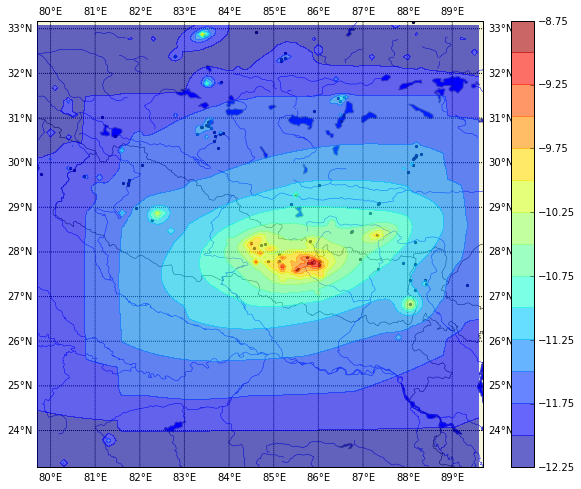

In [4]:
fg = plt.figure(1, figsize=(10,8))
plt.clf()
cm_fc = nepal_etas_fc.make_etas_contour_map(fignum=1, fig_size=(10,8))
cm_fc.scatter(*zip(*[[rw['lon'], rw['lat']] for rw in nepal_etas_fc.catalog if rw['mag']>5.]), marker='.',latlon=True )
# ... not the way to do this...
#ax=plt.gca()
#ax.set_xlim([83.,88.])
#ax.set_ylim([27., 29.5])
fg.savefig(os.path.join(revisions_data, 'nepal_fc_etas_contours.png'))

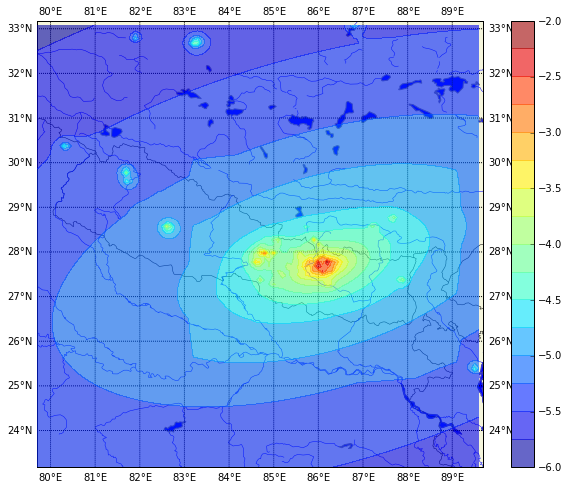

In [5]:
fg=plt.figure(2, figsize=(10,8))
plt.clf()
cm_test = nepal_etas_test.make_etas_contour_map(fignum=2, fig_size=(10,8))
fg.savefig(os.path.join(revisions_data, 'nepal_test_etas_contours.png'))

In [6]:
print(min(nepal_etas_test.catalog['event_date']))
print(max(nepal_etas_test.catalog['event_date']))

2015-05-07T19:32:33.960000-0500
2015-09-01T18:06:40.640000-0500


ROC for mc=4.0
len(xyz_ev):  142
ROC for mc=5.0
len(xyz_ev):  12
ROC for mc=6.0
len(xyz_ev):  2
ROC for mc=7.0
len(xyz_ev):  1


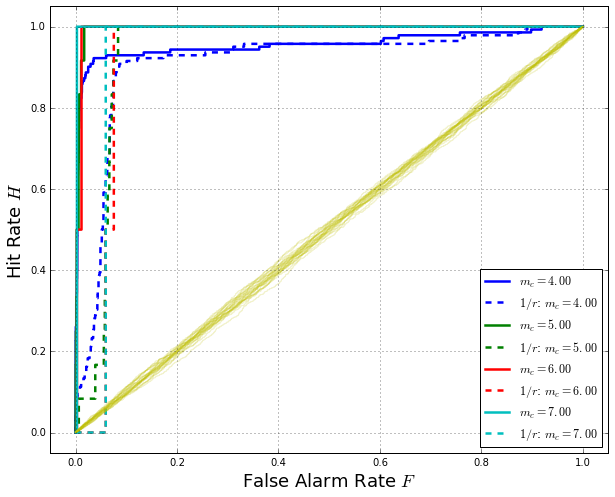

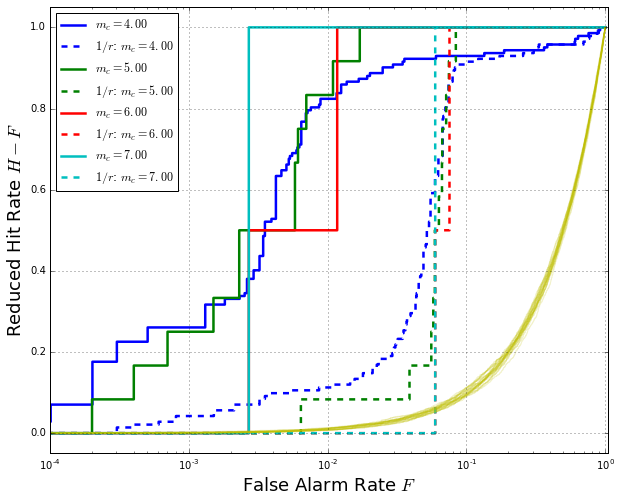

In [7]:
etas_test = nepal_etas_test
test_catalog = etas_test.catalog
etas_fc = nepal_etas_fc
#
x0 = nepal_epi_lon
y0 = nepal_epi_lat
null_dist_expon = 1.5     # exponent for null model, aka aftershocks fall off like 1/r**null_dist_expon
#
mag=7.8
L_r = .5*10**(.5*mag - 1.76)
xyz = etas_fc.ETAS_array
# make a null mode with z ~ 1/r. we'll probably need a contour figure of this.
xyz_null = [[x,y,((L_r + great_circle((y,x), (y0,x0)).km)**(-null_dist_expon))] for x,y,z in xyz]
xyz_null_1 = [[x,y,((L_r + great_circle((y,x), (y0,x0)).km)**(-1.))] for x,y,z in xyz]
xyz_events = list(zip(test_catalog['lon'], test_catalog['lat'], test_catalog['mag']))
#
# now, replace all of this "get x,y and ROC" stuff with the optimizers.roc_tools equivalents.
#roc_xyz_handler = optimizers.ROC_xyz_handler(xyz, list(zip(test_catalog['lon'], test_catalog['lat'], test_catalog['mag'])),
#                                            z_event_min=None)
#
#ROC_handler = ROC_xyz_handler(xyz, xyz_events, z_event_min=None)
#
fg1=plt.figure(fignum, figsize=(10,8))
plt.clf()
ax1=plt.gca()
ax1.set_xscale('linear')

fg2=plt.figure(fignum+1, figsize=(10,8))
plt.clf()
ax2=plt.gca()
ax2.set_xscale('log')

FHs = {}        # we'll use mc as a key, FH as a val: {mc:[FH]...}
for j,mc in enumerate(mcs):
    clr = colors_[j%len(colors_)]
    print('ROC for mc={}'.format(mc))
    #
    # there's a faster way to do this...
    xyz_ev = [[x,y,z] for x,y,z in xyz_events if z>=mc]
    print("len(xyz_ev): ", len(xyz_ev))
    ROC_real = optimizers.roc_tools.ROC_xyz_handler(xyz, xyz_events, z_event_min=mc)
    ROC_null = optimizers.roc_tools.ROC_xyz_handler(xyz_null, xyz_events, z_event_min=mc)
    #ROC_null_1 = optimizers.roc_tools.ROC_xyz_handler(xyz_null_1, xyz_events, z_event_min=mc)
    #
    #events = [z for x,y,z in ROC_handler if z>=mc]
    # calc_roc(Z_fc=self.z_fc, Z_ev=self.z_events
    FH      = ROC_real.calc_roc()
    FH_null = ROC_null.calc_roc()
    #FH_null_1 = ROC_null_1.calc_roc()
    #
    ax1.plot(*zip(*FH), ls='-', color=clr, marker='', lw=2.5, label='$m_c=%.2f$' % mc)
    ax1.plot(*zip(*FH_null), ls='--', color=clr, marker='', lw=2.5, label='$1/r$: $m_c=%.2f$' % mc)
    #
    #ax2.plot(*zip(*[[f,h-f] for f,h in FH]), ls='-', color=clr, marker='', lw=2.5, label='$m_c=%.2f$' % mc)
    #ax2.plot(*zip(*[[f,h-f] for f,h in FH_null]), ls='--', color=clr, marker='', lw=2.5, label='$1/r$: $m_c=%.2f$' % mc)
    ax2.plot(*zip(*FH), ls='-', color=clr, marker='', lw=2.5, label='$m_c=%.2f$' % mc)
    ax2.plot(*zip(*FH_null), ls='--', color=clr, marker='', lw=2.5, label='$1/r$: $m_c=%.2f$' % mc)
    #
    # try a fill-between on exp=1., exp=exp_aftershcks for the null model.
    #f_null = [f for f,h in FH_null]
    #h_null_0 = [h for f,h in FH_null]
    #h_null_1 = [h for f,h in FH_null_1]
    #
    #ax1.fill_between(f_null, h_null_0, h_null_1, color=clr, alpha=.4)
    
    #
    # now we need the 1/r model, or maybe a 1/r**1.35 or so, for the reviewer.
    #
    #plt.show()    # just in case...
    #
    # now, some random catalogs:

#plt.figure()
#z_min = min([z for x,y,z in xyz])
#z_max = max([z for x,y,z in xyz])
z_len = len(xyz)
for j in range(25):
    # we probably want a better model for this, but if it works, maybe we keep it.
    R = random.Random()
    #xyz_r = [[x,y,xyz[int(z_len*R.random())][2]] for x,y,z in xyz]
    #ROC_rand = optimizers.roc_tools.ROC_xyz_handler(xyz_r, xyz_events, z_event_min=mc)
    #
    fh = optimizers.roc_tools.calc_roc([z for x,y,z in xyz], sorted([z for x,y,z in xyz], key=lambda x: R.random())[0:int(.2*z_len)])
    #
    #this_etas = etas_analyzer.Toy_etas_random(etas_in=etas_fc)
    #FH = etas_analyzer.roc_normal(this_etas, fignum=None)
    ax1.plot(*zip(*fh), marker='', ls='-', alpha=.2, color='y')
    ax2.plot(*zip(*[[f,h] for f,h in fh]), marker='', ls='-', alpha=.2, color='y')
#
#ax1.plot(range(2), range(2), ls='--', color='m', lw=3., alpha=.75, zorder=2)
ax1.plot(*zip(*[[x,x] for x in numpy.arange(0.,1.,1000)]), marker='', ls='--', color='m', lw=2.)
ax2.plot(*zip(*[[x,x] for x in numpy.arange(0.,1.,1000)]), marker='', ls='--', color='m', lw=2.)
#
ax1.set_ylim(-.05, 1.05)
ax1.set_xlim((-.05, 1.05))
ax1.grid()
ax1.legend(loc=0, numpoints=1)
ax1.set_ylabel('Hit Rate $H$', size=18)
ax1.set_xlabel('False Alarm Rate $F$', size=18)
#
ax2.set_ylim(-.05, 1.05)
ax2.set_xlim((-.05, 1.05))
ax2.grid()
ax2.legend(loc=0, numpoints=1)
ax2.set_ylabel('Reduced Hit Rate $H-F$', size=18)
ax2.set_xlabel('False Alarm Rate $F$', size=18)
#self.__dict__.update(locals())
#

#################################################
#################################################
with open(os.path.join(revisions_data, 'nepal_xyz_etas_fc.xyz'), 'w') as f:
    f.write('#x\t\ty\tz\n')
    for rw in xyz:
        f.write('{}\n'.format('\t'.join([str(x) for x in rw])))
#
with open(os.path.join(revisions_data, 'nepal_xyz_etas_fc_nul_exp_135.xyz'), 'w') as f:
    f.write('#x\t\ty\tz\n')
    for rw in xyz:
        f.write('{}\n'.format('\t'.join([str(x) for x in rw])))
#

with open(os.path.join(revisions_data, 'nepal_test_catalog.cat'), 'w') as f:
    etas_test.catalog.tofile(f, sep='\t')
with open(os.path.join(revisions_data, 'nepal_fc_catalog.cat'), 'w') as f:    
    nepal_etas_fc.catalog.tofile(f, sep='\t')

fg1.savefig(os.path.join(revisions_data, 'nepal_roc_lin.png'))
fg2.savefig(os.path.join(revisions_data, 'nepal_roc_log.png'))


#A = nepal__ROC_script()

In [8]:
ROC_1 = optimizers.roc_tools.ROC_xyz_handler(xyz, xyz_events, z_event_min=None)
FH = ROC_1.calc_roc()

print(FH[0:5])

[[0.0, 0.0], [0.0, 0.027210884353741496], [0.00010079629069650237, 0.027210884353741496], [0.00010079629069650237, 0.04081632653061224], [0.00010079629069650237, 0.06802721088435375]]


In [9]:
# Now, let's write stuff to file:
plt.savefig(os.path.join(revisions_data, 'nepal_roc_figure.png'))


In [10]:
# import global_etas_auto

# aa=global_etas_auto.auto_etas()

# #print(aa)

# #plt.figure(0,figsize=(10,8))
# #ax=plt.gca()
# aa.make_etas_contour_map(fig_size=(10,8), n_contours=25 )
# date_str = str(dtm.datetimen.now())
# plt.title('ETAS, Pacific Islands, {%s}'.format(date_str))
# #
# plt.savefig('data/pacific/pacific_20160729_{}.png'.format(date_str))
# aa.export_xyz('data/pacific/pacific_20160729_{}.xyz'.format(date_str))
# aa.export_kml('data/pacific/pacific_20160729_{}.kml'.format(date_str))

# # ... and eventually write this into globalETAS()
# with open('data/pacific/pacific_cat_20160729_{}.cat'.format(date_str)), 'w') as f:
#     aa.catalog.tofile(f, '\t')

### Global ETAS and ROC
- see nepal_figs.py.global_roc_from_optimizer()
